<a href="https://www.kaggle.com/code/theallkeeeymist/credit-card-fraud-system?scriptVersionId=260257305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
train=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Axes: >

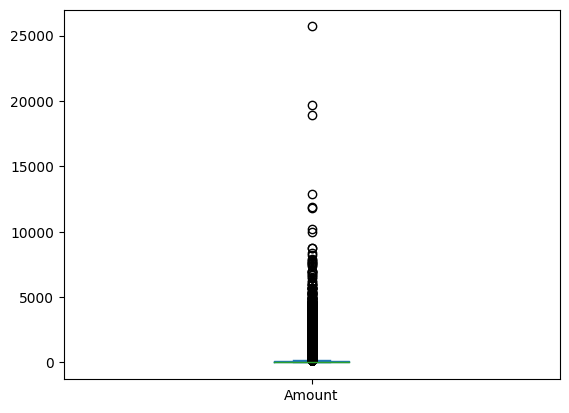

In [5]:
train['Amount'].plot(kind='box')

In [6]:
train[train['Amount']>7000].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
19760,30537.0,-14.191832,-25.313252,-7.578781,7.730844,-8.285413,3.994474,9.656752,-1.502509,-0.231141,...,4.696025,-4.067605,-6.869451,0.107527,-2.640366,-1.237598,-1.387145,1.389367,7879.42,0
23128,32605.0,-23.383129,-18.098804,-20.195367,4.249104,-42.147898,22.529298,36.677268,-4.862800,1.645619,...,-5.893230,-0.139751,-6.086173,1.924973,0.669689,0.449781,11.135740,-9.617915,7429.15,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0


In [7]:
train['Amount'].skew()

16.977724453761006

<Axes: ylabel='Frequency'>

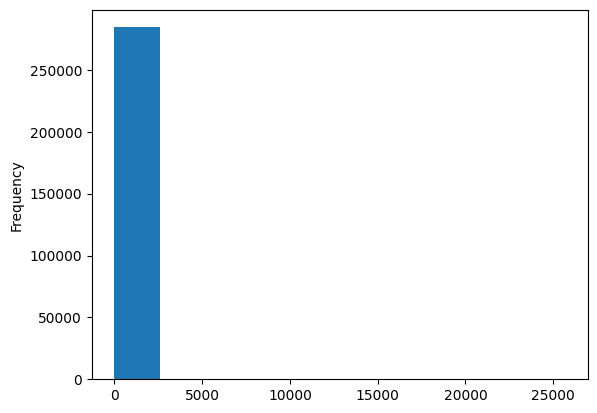

In [8]:
train['Amount'].plot(kind='hist')

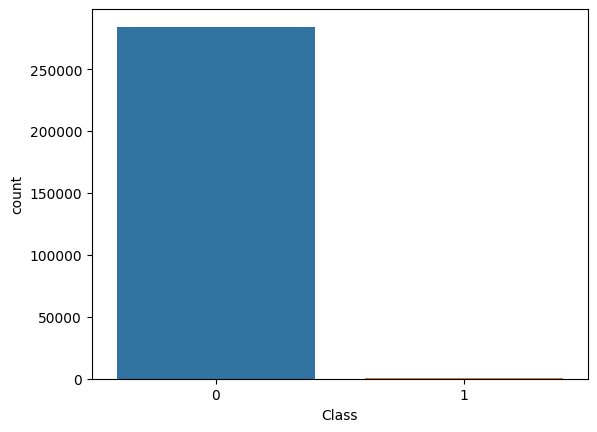

In [9]:
# count plot
sns.countplot(x='Class', data=train)
plt.show()

<Axes: ylabel='Density'>

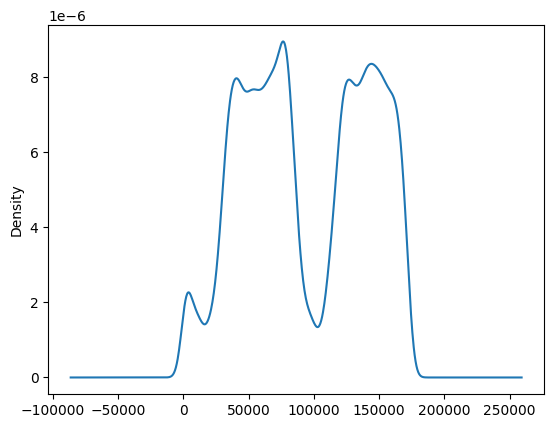

In [10]:
train['Time'].plot(kind='kde')

In [11]:
train['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [12]:
train['Time'].skew()

-0.03556761800632167

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


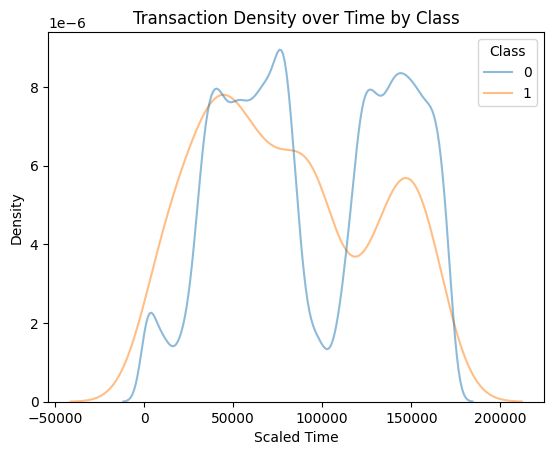

In [13]:
sns.kdeplot(data=train, x=train['Time'], hue="Class", fill=False, common_norm=False, alpha=0.5)
plt.title("Transaction Density over Time by Class")
plt.xlabel("Scaled Time")
plt.ylabel("Density")
plt.show()

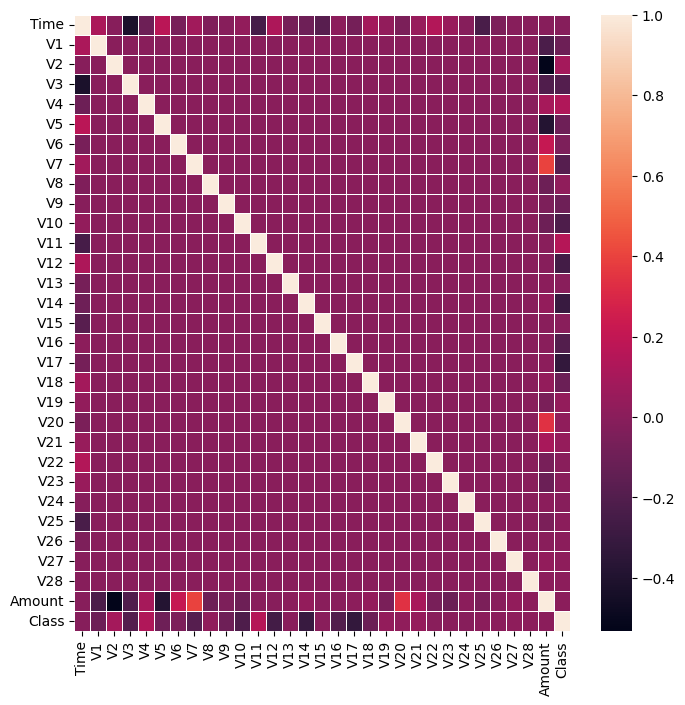

In [14]:
plt.figure(figsize=(8,8))
corr=train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.5, color="Blue")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


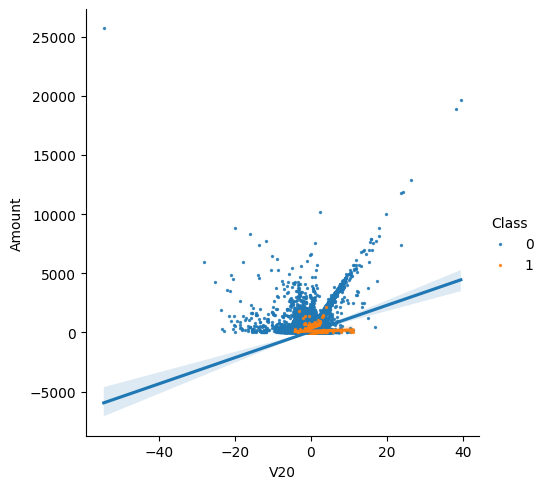

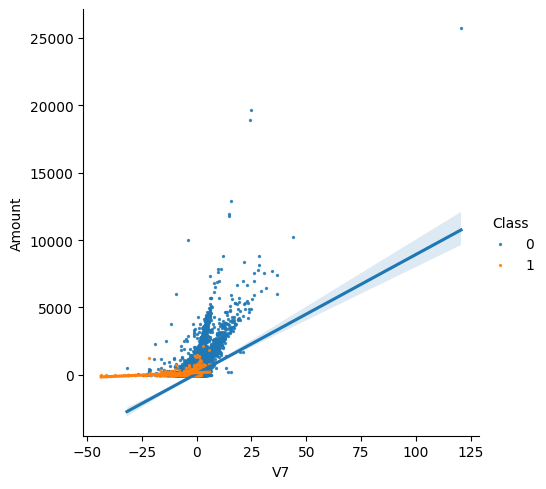

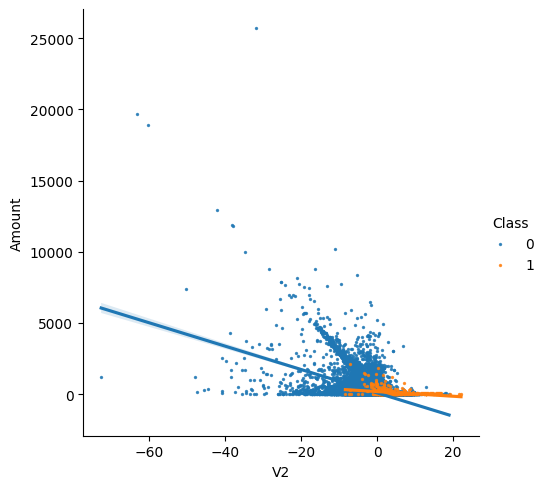

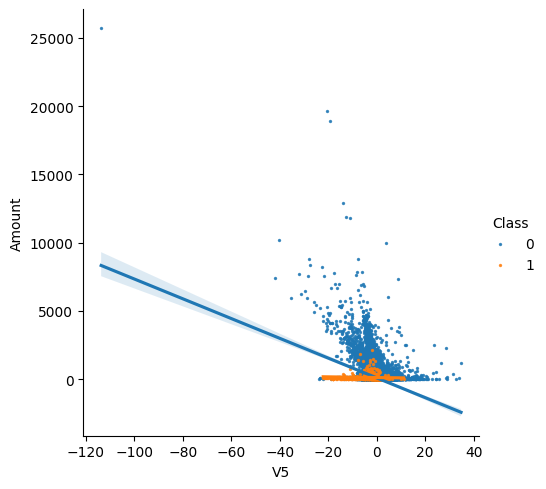

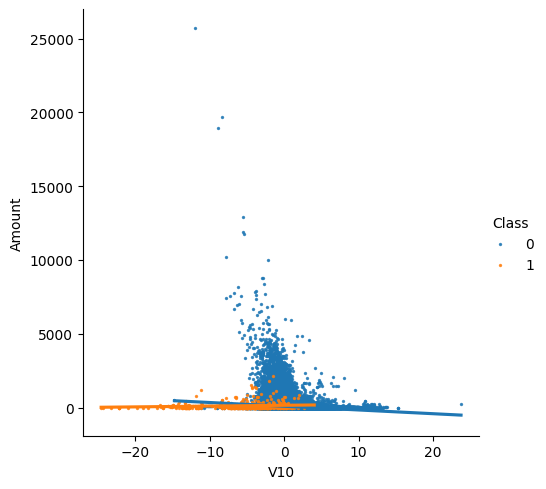

In [15]:
s = sns.lmplot(x='V20', y='Amount',data=train, hue='Class', fit_reg=True, scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=train, hue='Class', fit_reg=True, scatter_kws={'s':2})
s = sns.lmplot(x='V2', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V10', y='Amount', data=train, hue='Class', fit_reg=True, scatter_kws={'s':2})
plt.show()

In [16]:
per_not_fraud=train['Class'].value_counts()[0]/len(train) * 100
per_fraud=train['Class'].value_counts()[1]/len(train) * 100

print(per_not_fraud)
print(per_fraud)

99.82725143693798
0.1727485630620034


In [17]:
from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler=StandardScaler()
rob_scaler=RobustScaler()

train['scaled time']=rob_scaler.fit_transform(train['Time'].values.reshape(-1,1))
train['scaled amount']=rob_scaler.fit_transform(train['Amount'].values.reshape(-1,1))

In [18]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled time,scaled amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.994983,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.994983,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.994972,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.994972,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.994960,0.670579


In [19]:
scaled_amount=train['scaled amount']
scaled_time=train['scaled time']

train.drop(['Time', 'Amount', 'scaled amount', 'scaled time'], axis=1, inplace=True)

train.insert(0, 'scaled_amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)

train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

In [21]:
train['scaled_time'].skew()

-0.035567618006321425

In [22]:
# !pip install --upgrade scikit-learn imbalanced-learn

In [23]:
# import sklearn, imblearn, xgboost
# print("sklearn:", sklearn.__version__)
# print("imblearn:", imblearn.__version__)
# print("xgboost:", xgboost.__version__)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

X=train.drop(columns=["Class"])
y=train["Class"]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# r_over=RandomOverSampler(random_state=42)
# X_train_over,y_train_over=r_over.fit_resample(X_train, y_train)

rf_model=RandomForestClassifier(
    n_estimators=500,
    max_depth=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

xgb=XGBClassifier(
    n_estimators=500,
    min_child_weight=30,
    learning_rate=0.01,
    scale_pos_weight=(len(train[train['Class']==0])/len(train[train['Class']==1])),
    eval_metric='auc',
    booster='dart',
    objective='binary:logistic',
    max_depth=5,
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    random_state=42,
    verbosity=2,
    n_jobs=-1,
)

xgb.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:09:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:09:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[05:09:12] I

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, predictor='gpu_predictor', ...)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:09:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:09:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Random Forest Classififer AUC_ROC: 0.9736146322625842

Classification Report:

              precision    recall  f1-score   support

           0     0.9998    0.9979    0.9988     56864
           1     0.4183    0.8878    0.5686        98

    accuracy                         0.9977     56962
   macro avg     0.7090    0.9428    0.7837     56962
weighted avg     0.9988    0.9977    0.9981     56962



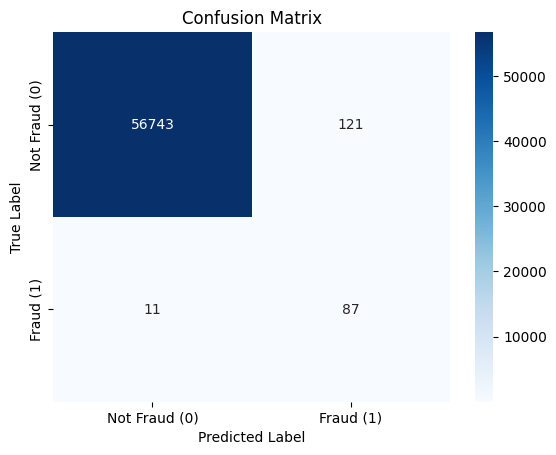

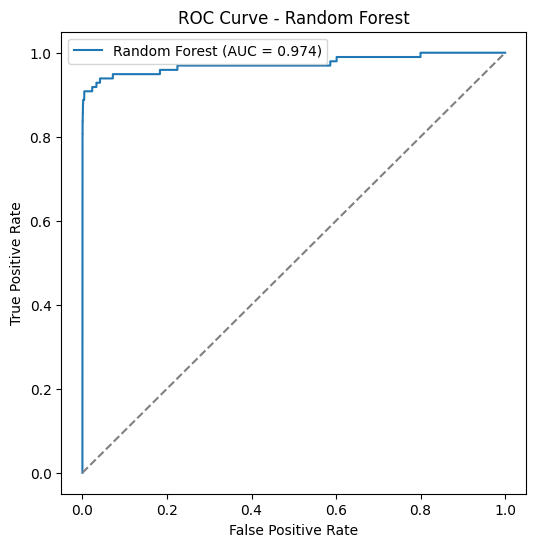

In [25]:
y_pred_proba=xgb.predict_proba(X_test)[:,1]
y_pred=(y_pred_proba>=0.65).astype(int)

auc=roc_auc_score(y_test, y_pred_proba)
print(f"Random Forest Classififer AUC_ROC: {auc}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["Not Fraud (0)", "Fraud (1)"], yticklabels=["Not Fraud (0)", "Fraud (1)"])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [26]:
import joblib

joblib.dump(xgb, "model_xgb_best.pkl")

['model_xgb_best.pkl']